In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# classifier libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_predict, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluation metrics
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score,accuracy_score

In [2]:
# importing data
data = pd.read_csv(r"C:\Users\hp\Desktop\Data analysis\Python\Project\customer_churn\Customer-Churn.csv")

In [3]:
# checking the first 3 rows of the data
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
# checking the total number of rows and columns
data.shape

(7043, 21)

In [5]:
# checking for missing data
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- The total charges column is missing 11 values.

In [7]:
# checking the statistical distribution of the numerical features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [8]:
# checking the statistical distribution of the categorical features
data.describe(include=['bool','object']).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


#### Data Visualization

In [9]:
#function that calculates and adds percentages to graph plots
def plot_p(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()
    
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(8, 3.5), kde=True, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram   
    
    
    
### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

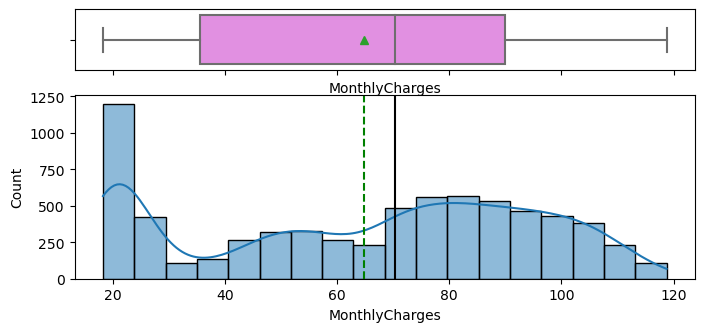

In [10]:
# boxplot distribution of numerical features
histogram_boxplot(data, 'MonthlyCharges');

- The chart shows that there are no outliers in the MonthlyCharge feature, the histogram shows a negative skewness i.e. the feature data is not normally distributed.

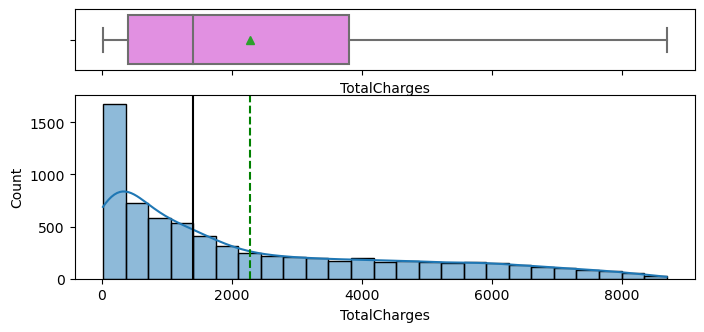

In [11]:
histogram_boxplot(data, 'TotalCharges');

- The chart shows that there are no outliers in the TotalCharges feature, the histogram shows a positive skewness i.e. the feature data is not mormally distributed.

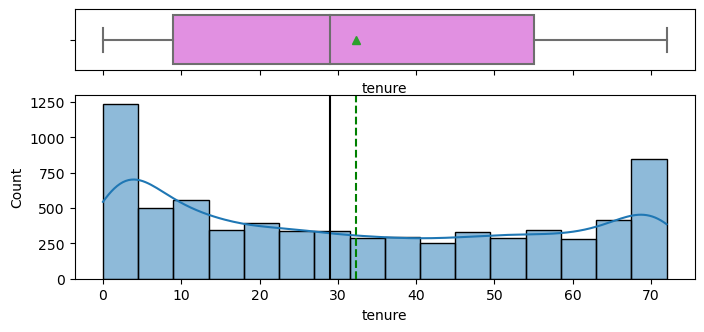

In [12]:
histogram_boxplot(data, 'tenure');

- The chart shows that there are no outliers in the tenure feature, the histogram shows a positive skewness i.e. the feature data is not mormally distributed.

In [14]:
data.tenure.value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

In [15]:
# dropping the customerID feature
data.drop('customerID', axis=1, inplace=True)

In [16]:
for column in data.columns:
    print(data[column].value_counts())

gender
Male      3555
Female    3488
Name: count, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No

In [17]:
# changing 'No internet service' and 'No phone service' to 'No'
strings_to_replace = ["No internet service", "No phone service"]

# Iterate over each column
for column in data.columns:
    # Check if column contains strings to replace
    if any(data[column].isin(strings_to_replace)):
        # Replace strings in the column
        data[column] = data[column].replace(strings_to_replace, "No")

In [18]:
# Define the bins for each feature
tenure_bins = [0, 14, 28, 42, 56, 72]  # 5 bins for tenure
monthly_charges_bins = [18.25, 38.25, 58.25, 78.25, 98.25, 118.75]  # 5 bins for MonthlyCharges
total_charges_bins = [18.80, 1734.80, 3450.80, 5166.80, 6882.80, 8684.80]  # 5 bins for TotalCharges

# Define labels for each bin (using descriptive names)
tenure_labels = ['0-14', '15-28', '29-42', '43-56', '57-72']
monthly_charges_labels = ['Low (18.25-38.25)', 'Medium (38.26-58.25)', 'Medium-High (58.26-78.25)', 'High (78.26-98.25)', 'Very High (98.26-118.75)']
total_charges_labels = ['Low (18.80-1734.80)', 'Medium (1734.81-3450.80)', 'Medium-High (3450.81-5166.80)', 'High (5166.81-6882.80)', 'Very High (6882.81-8684.80)']

# Apply binning and assign labels to new features
data['tenure_gp'] = pd.cut(data['tenure'], bins=tenure_bins, labels=tenure_labels, right=False)
data['MonthlyCharges_gp'] = pd.cut(data['MonthlyCharges'], bins=monthly_charges_bins, labels=monthly_charges_labels, right=False)
data['TotalCharges_gp'] = pd.cut(data['TotalCharges'], bins=total_charges_bins, labels=total_charges_labels, right=False)

In [19]:
for column in data.columns:
    print(data[column].value_counts())

gender
Male      3555
Female    3488
Name: count, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64
OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64
DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64
TechSupport
No     4999
Yes    2044
Name: count, dtype: int64
StreamingTV
No     4336
Yes    2707
Name: count, dtype: int64
StreamingMovies
No     4311
Yes    2732
Name: count, dt

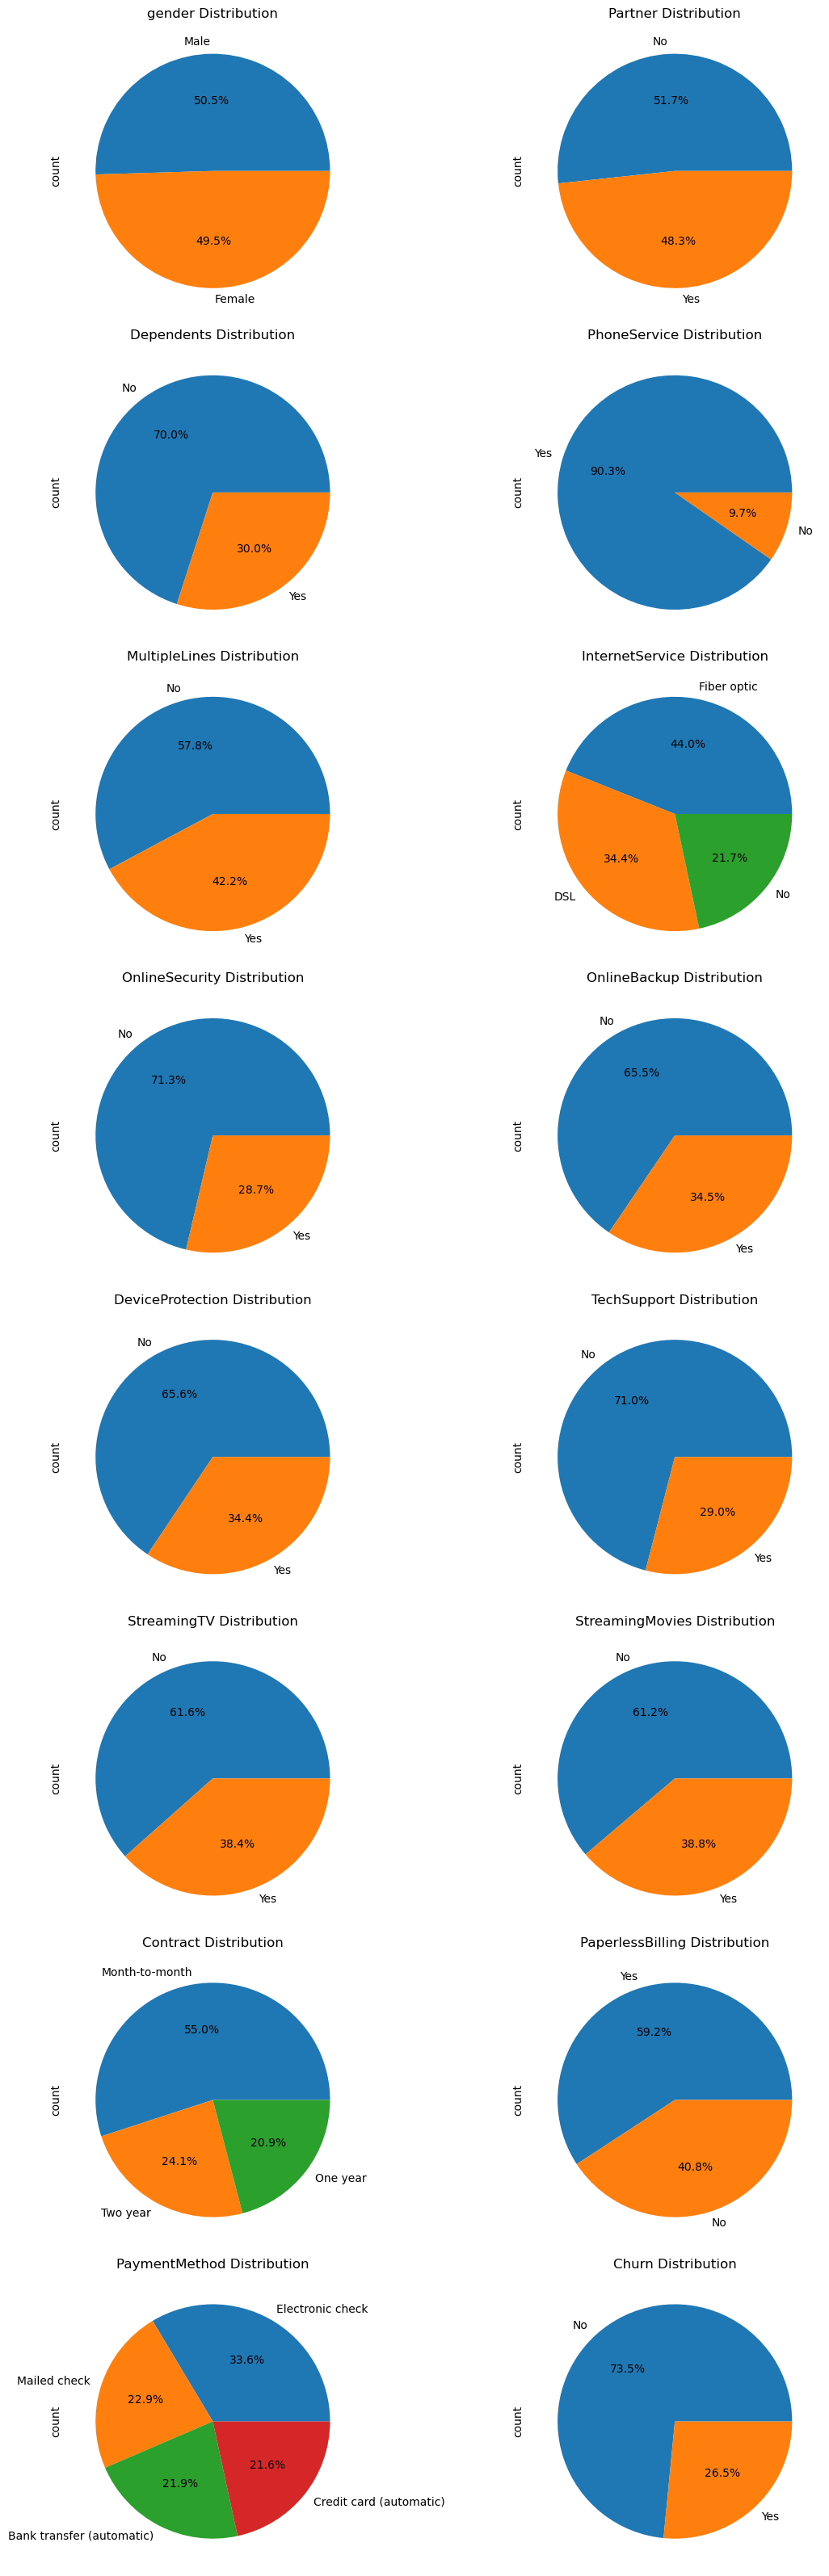

In [20]:
def plot_with_percentage(data, max_cols=2):
  """
  Plots pie charts with percentages for categorical columns in subplots.

  Args:
    data (pandas.DataFrame): The data to analyze.
    max_cols (int, optional): The maximum number of columns in the subplots. Defaults to 2.

  Returns:
    None
  """

  categorical_cols = [col for col in data.columns if data[col].dtype == 'object']
  num_plots = len(categorical_cols)
  num_rows = (num_plots + max_cols - 1) // max_cols  # Efficient row calculation

  fig, axes = plt.subplots(nrows=num_rows, ncols=min(max_cols, num_plots), figsize=(12, num_rows * 4))  # Adjust figsize as needed

  for i, col in enumerate(categorical_cols):
    ax = axes.flat[i]  # Access axes in flattened order for flexibility
    data[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax)  # Use pie chart with percentages
    ax.set_title(f'{col} Distribution')

  # Adjust layout (optional)
  plt.tight_layout()
  plt.show();

# Call the function with your data
plot_with_percentage(data);

Customer Count by Features
- Higher proportion of customers are male (50.48)
- More of the customers have no partners (51.7%)
- 70% of the customers do not have dependents
- 90% of the customers have access to phone services
- 58% have multiple lines
- 44% have internet service
- 71% do not have online security services
- 66% do not have device protection services
- 71% do no have tech support services
- 66% do not have online backup services
- 61% do not not have streamingtv services
- 61% do no stream movies services
- 55% are on month-to-month contract
- 59% make use of paperless billing
- 74% of the custormers have not churned (not canceled the service).

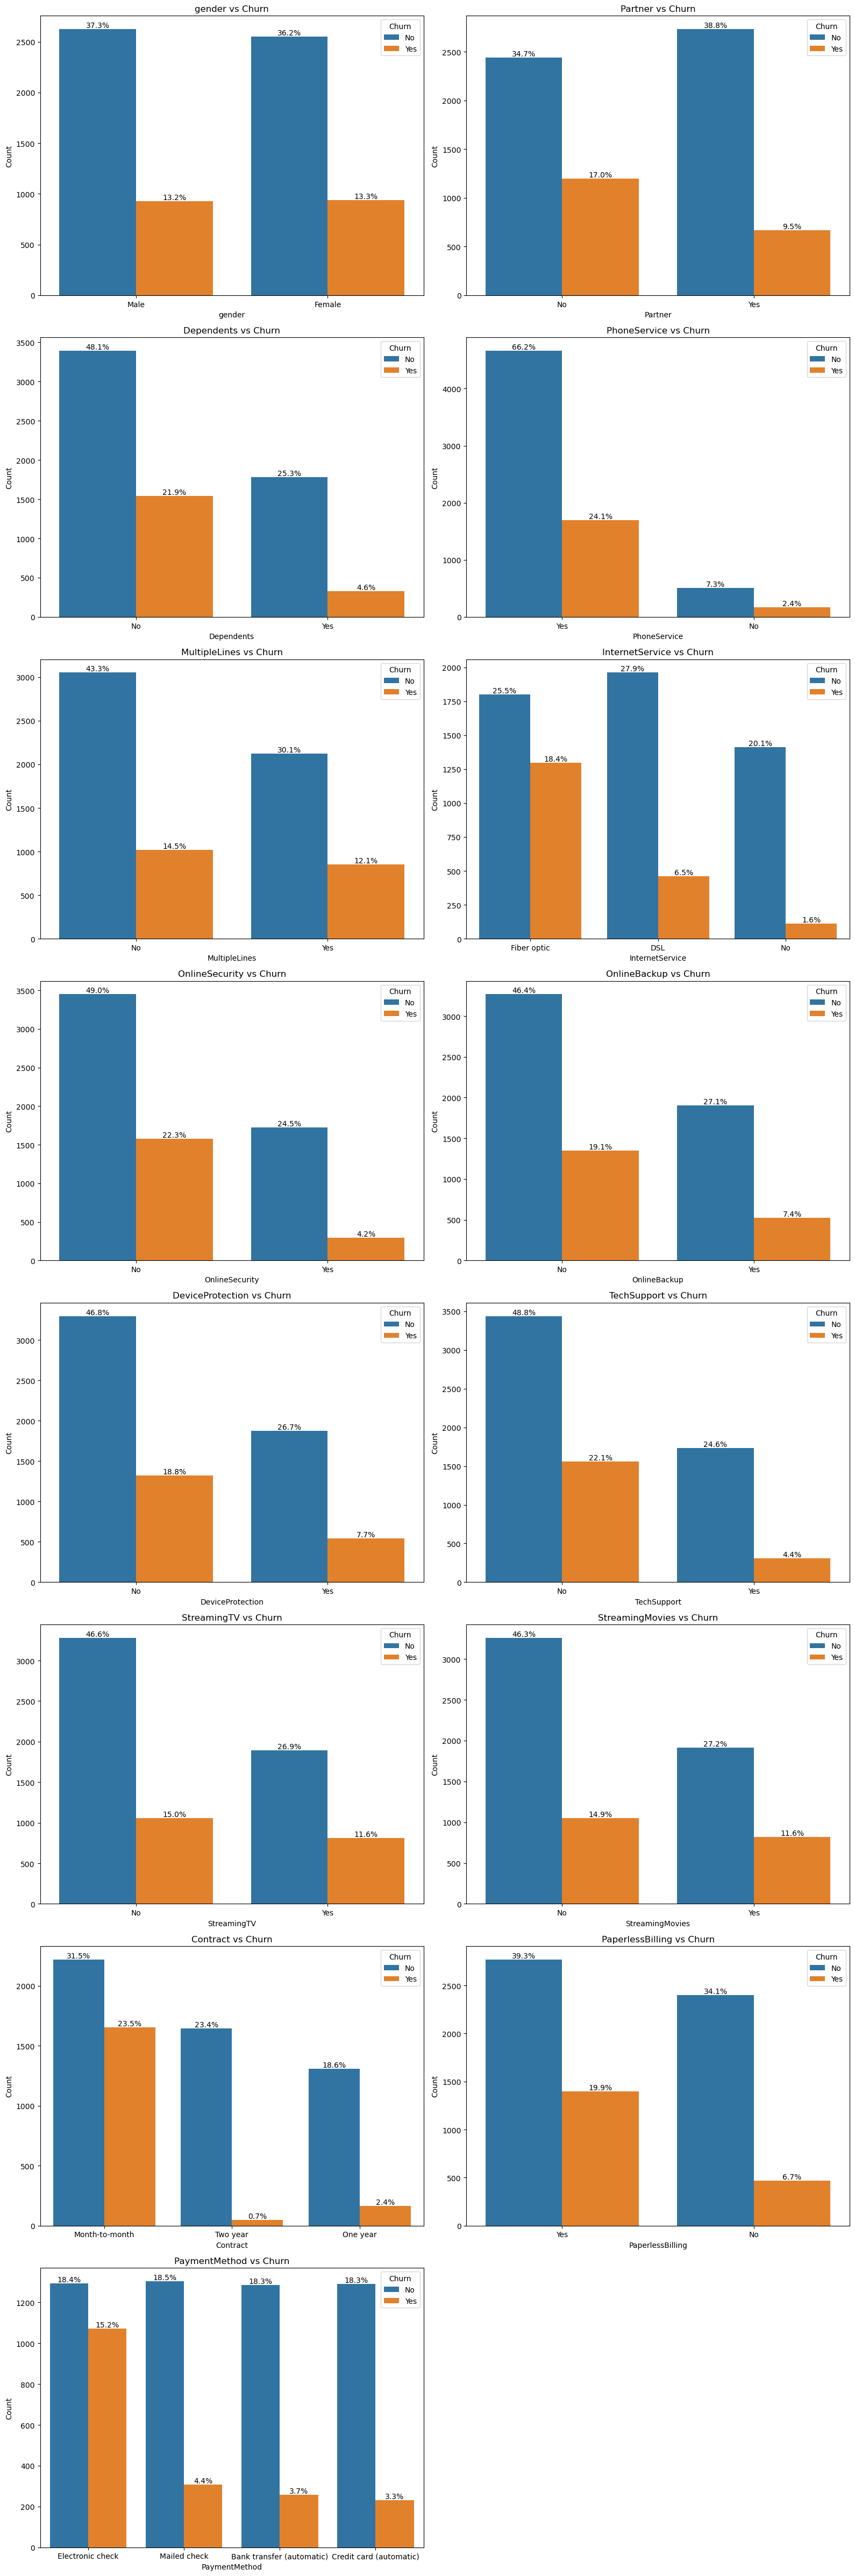

In [21]:
import math
def plot_categorical_relationships(data, target_feature, max_cols_per_row=2):
    # Exclude target feature from categorical columns
    categorical_columns = [col for col in data.columns if data[col].dtype == 'object' and col != target_feature]
    
    num_plots = len(categorical_columns)
    
    # Calculate number of rows and columns
    num_rows = math.ceil(num_plots / max_cols_per_row)
    num_cols = min(num_plots, max_cols_per_row)
    
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(8*num_cols, 6*num_rows))
    axs = axs.flatten()  # Flatten the axes array to iterate over
    
    for i, column in enumerate(categorical_columns):
        ax = axs[i]
        sns.countplot(x=column, hue=target_feature, data=data, order=data[column].value_counts().index, ax=ax)
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.set_title(f'{column} vs {target_feature}')
        ax.legend(title=target_feature)
        
        total = float(len(data))
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width()/2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='bottom')
        
    # Hide empty subplots
    for i in range(num_plots, len(axs)):
        axs[i].axis('off')
    
    plt.tight_layout()

# Assuming 'data' is your DataFrame and 'Churn' is the target feature
plot_categorical_relationships(data, 'Churn')
plt.show();

Churn Analysis:
- Both gender types have the same churn proportion.
- Customers that have no partners have a higher churn proportion.
- Customers with dependents have higher churn proportion.
- Customers that have access to phone services, online security, online backup have a higher churn proportion  
- Customers with no device protection, no tech support, no streaming services (TV and Movies), no mutltiple lines have a higher churn proportion. 
- Customers with month-to-month subscription have a higher churn proportion while those with two year subscription have lower churn proportion.
- Customers with access to paperless billing have a higher churn proportion.
- Customers with access to electornic check payment method have a higher churn proportion while those with credit card payment option have a lower churn proportion.
- Customers using Fiber optic have a higher proportion of churn while those with no internet services have the lowest churn proportion.
- Customers that are not senior citizens have a higher churn proportion

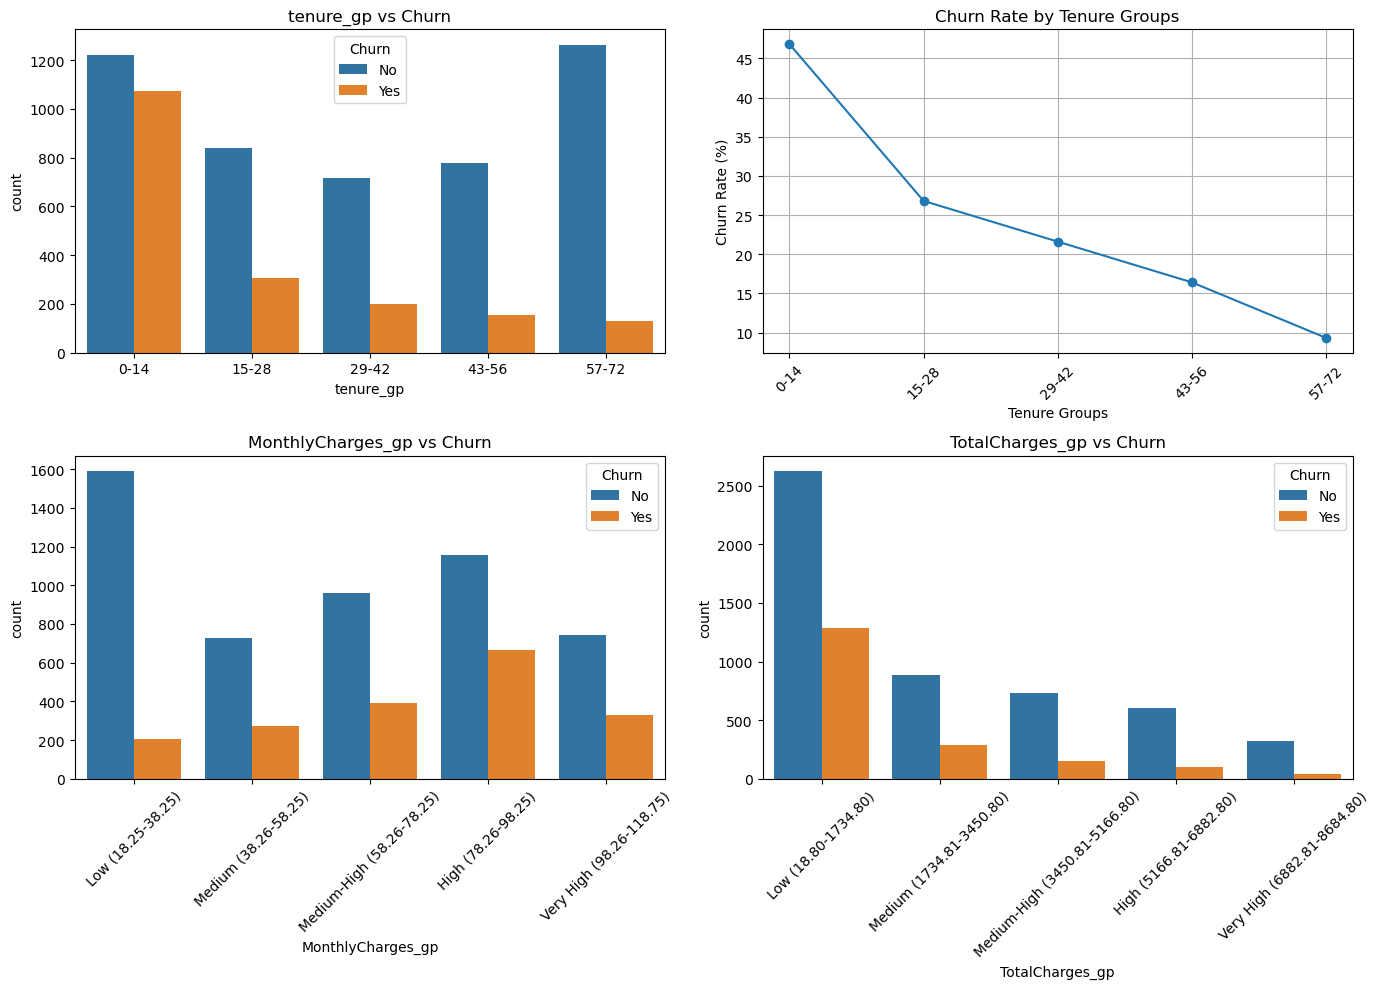

In [23]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot tenure_gp vs Churn
sns.countplot(x=data['tenure_gp'], hue=data['Churn'], ax=axs[0, 0])
axs[0, 0].set_title('tenure_gp vs Churn')

# Calculate churn rate for each tenure group
tenure_churn_rate = data.groupby('tenure_gp')['Churn'].value_counts(normalize=True).loc[:, 'Yes'] * 100
axs[0, 1].plot(tenure_churn_rate.index, tenure_churn_rate.values, marker='o', linestyle='-')
axs[0, 1].set_title('Churn Rate by Tenure Groups')
axs[0, 1].set_xlabel('Tenure Groups')
axs[0, 1].set_ylabel('Churn Rate (%)')
axs[0, 1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
axs[0, 1].grid(True)

# Plot MonthlyCharges_gp vs Churn
sns.countplot(x=data['MonthlyCharges_gp'], hue=data['Churn'], ax=axs[1, 0])
axs[1, 0].set_title('MonthlyCharges_gp vs Churn')
axs[1, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis ticks

# Plot TotalCharges_gp vs Churn
sns.countplot(x=data['TotalCharges_gp'], hue=data['Churn'], ax=axs[1, 1])
axs[1, 1].set_title('TotalCharges_gp vs Churn')
axs[1, 1].tick_params(axis='x', rotation=45)  # Rotate x-axis ticks

plt.tight_layout()  # Adjust layout to prevent overlapping titles and labels
plt.show();

- Customers with shorter tenure have higher churn rate
- Cusmertomers with higher monthly charges have a higher churn rate
- Customers with low total charges a higher churn rate

In [25]:
# selecting out the numerical features of the dataset
data_num = data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

In [26]:
# Filter churned customers
churned_data = data[data['Churn'] == 'Yes']

# Calculate ARPU (average revenue per churned customer)
arpu = churned_data["TotalCharges"].mean()
print('Average revenue per churned customer: ', int(arpu))

# Calculate total revenue lost
total_revenue_lost = arpu * len(churned_data)
print('Total revenue by churned customers: ', int(total_revenue_lost))
print('')

# Calculate average revenue from all customers
average_revenue = data["TotalCharges"].mean()
print('Average revenue from all customers: ', int(average_revenue))

# Calculate total revenue from all customers
total_revenue = data["TotalCharges"].mean() * len(data)
print('Total revenue from all customers: ', int(total_revenue))
print('')

revenue_loss_pct = (churned_data["TotalCharges"].sum() / data["TotalCharges"].sum()) * 100
print("Revenue loss percentage due to churn: ", round(revenue_loss_pct,2), "%")

Average revenue per churned customer:  1531
Total revenue by churned customers:  2862926

Average revenue from all customers:  2283
Total revenue from all customers:  16081285

Revenue loss percentage due to churn:  17.83 %


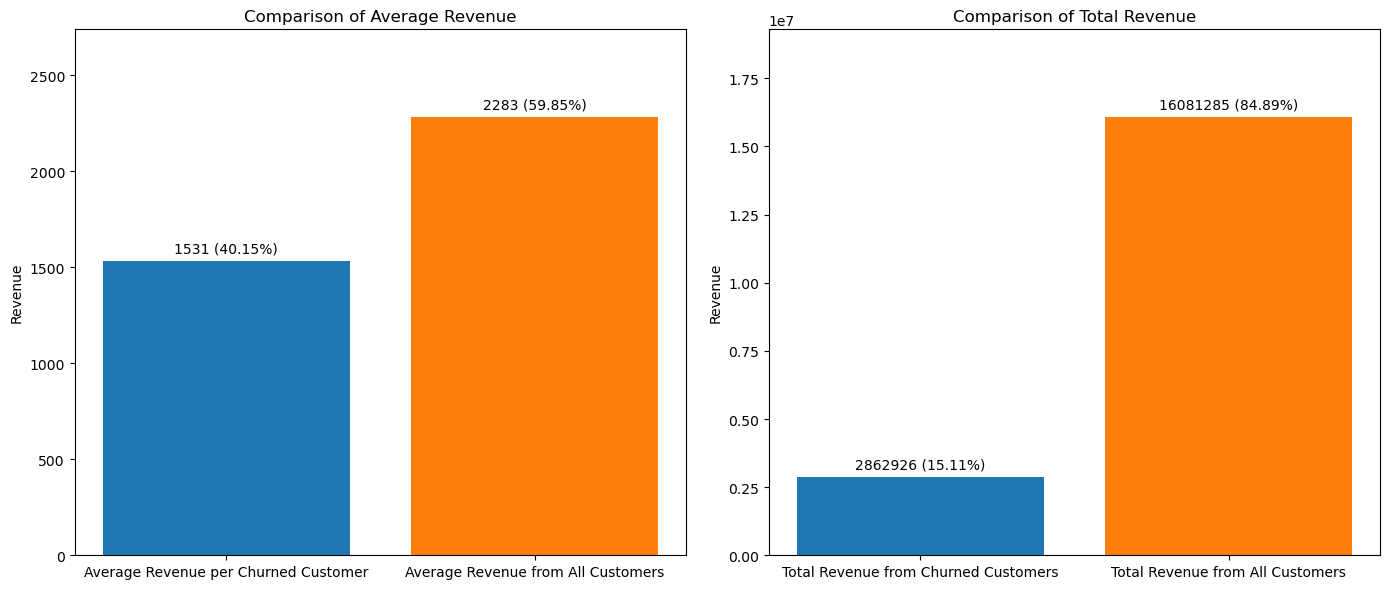

In [27]:
# Define the data
labels = ['Average Revenue per Churned Customer', 'Average Revenue from All Customers']
values = [arpu, average_revenue]
total_labels = ['Total Revenue from Churned Customers', 'Total Revenue from All Customers']
total_values = [total_revenue_lost, total_revenue]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot Average Revenue
axs[0].bar(labels, values, color=['#1f77b4', '#ff7f0e'])
axs[0].set_ylabel('Revenue')
axs[0].set_title('Comparison of Average Revenue')
axs[0].set_ylim(0, max(values) * 1.2)  # Adjust ylim for better visualization

# Add percentage labels
for i, v in enumerate(values):
    axs[0].text(i, v + max(values) * 0.02, f"{int(v)} ({round((v / sum(values)) * 100, 2)}%)", color='black', ha='center')

# Plot Total Revenue
axs[1].bar(total_labels, total_values, color=['#1f77b4', '#ff7f0e'])
axs[1].set_ylabel('Revenue')
axs[1].set_title('Comparison of Total Revenue')
axs[1].set_ylim(0, max(total_values) * 1.2)  # Adjust ylim for better visualization

# Add percentage labels
for i, v in enumerate(total_values):
    axs[1].text(i, v + max(total_values) * 0.02, f"{int(v)} ({round((v / sum(total_values)) * 100, 2)}%)", color='black', ha='center')

# Show plot
plt.tight_layout()
plt.show();

In [28]:
# selecting numerocal features
data_num = data[['MonthlyCharges', 'TotalCharges', 'Churn','tenure']]

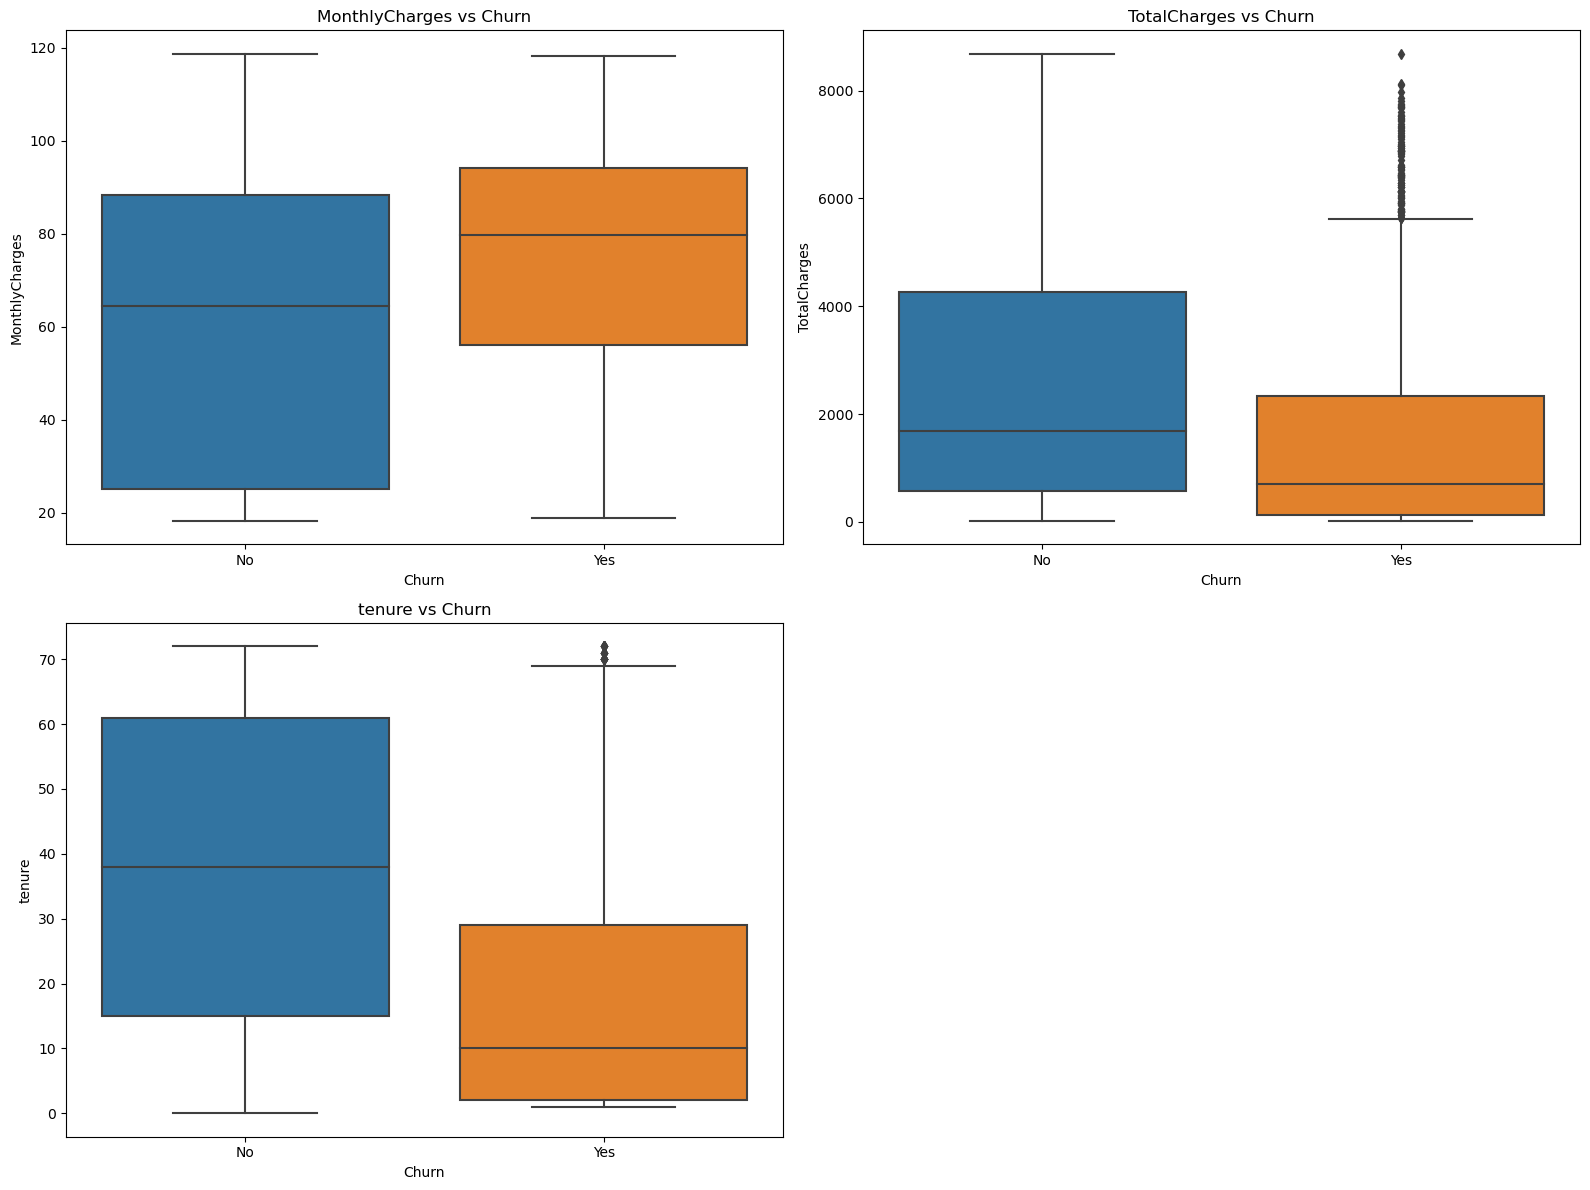

In [29]:
# relationship between churn and numerical features
def plot_numerical_relationships(data, target_feature, max_cols_per_row=2):
    # Exclude target feature from numerical columns
    numerical_columns = [col for col in data.columns if data[col].dtype != 'object' and col != target_feature]
    
    num_plots = len(numerical_columns)
    
    # Calculate number of rows and columns
    num_rows = math.ceil(num_plots / max_cols_per_row)
    num_cols = min(num_plots, max_cols_per_row)
    
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(8*num_cols, 6*num_rows))
    axs = axs.flatten()  # Flatten the axes array to iterate over
    
    for i, column in enumerate(numerical_columns):
        ax = axs[i]
        sns.boxplot(x=target_feature, y=column, data=data, ax=ax)
        ax.set_xlabel(target_feature)
        ax.set_ylabel(column)
        ax.set_title(f'{column} vs {target_feature}')
        
    # Hide empty subplots
    for i in range(num_plots, len(axs)):
        axs[i].axis('off')
    
    plt.tight_layout()

# Assuming 'data' is your DataFrame and 'Churn' is the target feature
plot_numerical_relationships(data_num, 'Churn')
plt.show();

- Tenure vs Churn: The boxplot shows that customers who churn tend to have a shorter tenure with the company. The median tenure for customers who churn is around 10 years, while the median tenure for customers who do not churn is around 40 years.

- Monthly Charges vs Churn: The boxplot shows that customers who churn tend to have higher monthly charges. The median monthly charge for customers who churn is around 70, while the median monthly charge for customers who do not churn is around 80.

- Total Charges vs Churn: The boxplot shows that customers who churn tend to have lower total charges than customers who do not churn. This seems counterintuitive at first, but it can be explained by tenure. Customers who churn early may not have had time to accumulate high total charges.

In [30]:
# replacing missing values in the TotalCharges feature with the median value
df = data.copy()
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [31]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

- As seen above 'Yes' for 'Churn' is significantly underrepresented. Balancing the dataset before training can help mitigate this issue and improve the model's performance

In [32]:
# handling data imbalance
churn_no = df[data.Churn == 'No']
churn_yes = df[data.Churn == 'Yes']

In [33]:
print(churn_no.shape, churn_yes.shape)

(5174, 23) (1869, 23)


In [34]:
# undersampling the dataset inorder to handle data imbalance
sample = churn_no.sample(n=1869)

# merging the legit-sample to fraud dataset
df2 = pd.concat((sample, churn_yes), axis=0)

In [35]:
print(df2.shape)

(3738, 23)


In [36]:
df2.Churn.value_counts()

Churn
No     1869
Yes    1869
Name: count, dtype: int64

In [37]:
df2.tenure_gp.value_counts()

tenure_gp
0-14     1535
15-28     604
57-72     577
29-42     458
43-56     426
Name: count, dtype: int64

In [38]:
# Separating the data feature from the target label
x = df2.drop(columns=['Churn', 'MonthlyCharges_gp', 'TotalCharges_gp', 'tenure_gp'], axis=1)
y = df2['Churn']

In [39]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5672,Female,0,Yes,No,49,Yes,Yes,DSL,Yes,Yes,Yes,No,No,Yes,One year,No,Electronic check,71.80,3472.05
600,Male,0,No,No,16,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),74.55,1170.50
5029,Female,0,Yes,No,7,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),50.30,355.10
5464,Male,0,No,No,25,Yes,No,No,No,No,No,No,No,No,Two year,Yes,Mailed check,20.75,499.40
4885,Male,1,Yes,No,72,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),111.65,8022.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25


In [40]:
# convert categorial columns to numerical columns
encoder = LabelEncoder()  # method initialize

# looping through the columns in the dataset
for c in x.columns[:]:
    if(x[c].dtype == 'object'):
        x[c] = encoder.fit_transform(x[c])
    else:
        x[c] = x[c]

In [41]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5672,0,0,1,0,49,1,1,0,1,1,1,0,0,1,1,0,2,71.80,3472.05
600,1,0,0,0,16,1,0,1,0,0,0,1,0,0,0,1,1,74.55,1170.50
5029,0,0,1,0,7,1,0,0,1,0,0,0,0,0,0,1,0,50.30,355.10
5464,1,0,0,0,25,1,0,2,0,0,0,0,0,0,2,1,3,20.75,499.40
4885,1,1,1,0,72,1,1,1,0,1,1,1,1,1,2,1,0,111.65,8022.85


In [42]:
# scaling the dataset
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

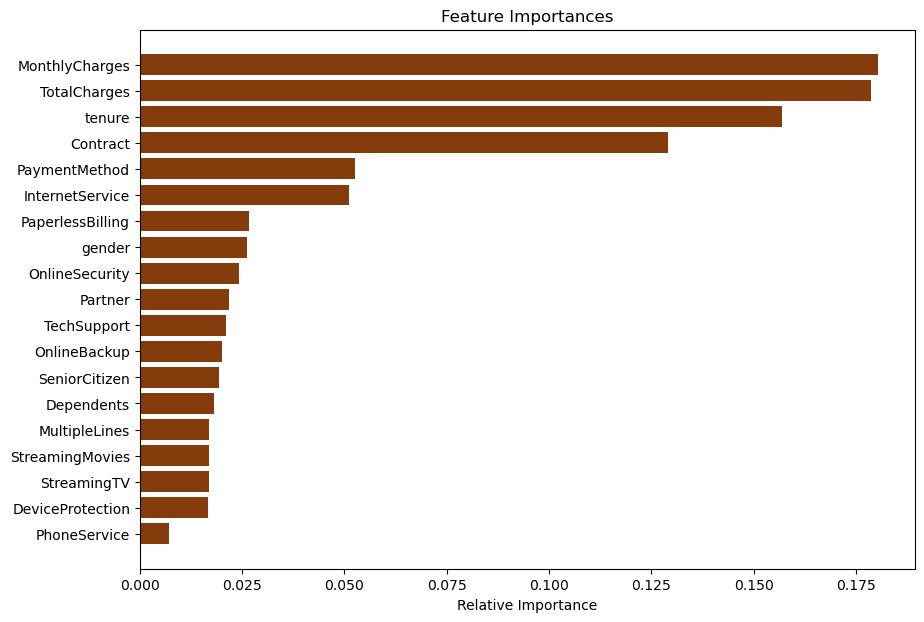

In [43]:
#plotting a feature importance chart for the data
model = RandomForestClassifier()
# fit the model
model.fit(x, y)
feature_names = list(x.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 7))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='#843C0C', align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show();

- TotalCharges and MonthlyCharges are the highest features influencing churn. Tenure comes second.

#### Model Building

In [44]:
# list of models
models = [LogisticRegression(max_iter=1000), 
          SVC(kernel='linear'), 
          KNeighborsClassifier(), 
          RandomForestClassifier(random_state=0), 
          GradientBoostingClassifier(),
          DecisionTreeClassifier(),
          XGBClassifier()
         ]

def compare_models():
    results = []
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)  # Encode target labels
    
    for model in models:
        cv_scores = cross_val_score(model, x, y_encoded, cv=5, scoring='accuracy')
        y_pred = cross_val_predict(model, x, y_encoded, cv=5)
        
        # Calculate evaluation metrics
        accuracy = np.mean(cv_scores)
        f1 = f1_score(y_encoded, y_pred)
        roc_auc = roc_auc_score(y_encoded, y_pred)
        precision = precision_score(y_encoded, y_pred)
        recall = recall_score(y_encoded, y_pred)
        
        results.append({
            'Model': model.__class__.__name__,
            'Accuracy': round(accuracy, 2),
            'F1 Score': round(f1, 2),
            'ROC AUC': round(roc_auc, 2),
            'Precision': round(precision, 2),
            'Recall': round(recall, 2)
        })
    
    return pd.DataFrame(results)

In [45]:
model_comparison_df = compare_models()

In [46]:
print(pd.DataFrame(model_comparison_df))

                        Model  Accuracy  F1 Score  ROC AUC  Precision  Recall
0          LogisticRegression      0.76      0.77     0.76       0.74    0.80
1                         SVC      0.75      0.77     0.75       0.72    0.82
2        KNeighborsClassifier      0.71      0.72     0.71       0.68    0.77
3      RandomForestClassifier      0.74      0.74     0.74       0.74    0.75
4  GradientBoostingClassifier      0.75      0.76     0.75       0.73    0.80
5      DecisionTreeClassifier      0.67      0.67     0.67       0.67    0.68
6               XGBClassifier      0.73      0.74     0.73       0.73    0.75


In [47]:
y_encoded = encoder.fit_transform(y)

# Define models and their corresponding hyperparameters
models_parameters = [
    (LogisticRegression(), {'C': [1, 5, 10, 20], 'max_iter': [1000, 5000, 10000]}),
    (SVC(), {'kernel': ['linear', 'poly', 'sigmoid', 'rbf'], 'C': [1, 5, 10, 20]}),
    (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7], 'algorithm': ['auto', 'ball_tree', 'kd_tree']}),  
    (RandomForestClassifier(random_state=0), {'n_estimators': [10, 20, 50, 100]}),
    (GradientBoostingClassifier(), {'learning_rate': [0.1, 0.01], 'n_estimators': [100, 200, 500]}),
    (DecisionTreeClassifier(), {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10]}),
    (XGBClassifier(), {'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 5, 7]})
]

# Function to perform model selection
def modelSelection(models_parameters, x, y):
    results = []
    
    for model, params in models_parameters:
        classifier = GridSearchCV(model, params, cv=5)
        classifier.fit(x, y)
        
        results.append({
            'Model': model.__class__.__name__,
            'TopScore': round(classifier.best_score_, 2),
            'Best hyperparameters': classifier.best_params_
        })
        
    return pd.DataFrame(results)

# Call the model selection function
model_comparison_df = modelSelection(models_parameters, x, y_encoded)
print(model_comparison_df)

                        Model  TopScore  \
0          LogisticRegression      0.76   
1                         SVC      0.75   
2        KNeighborsClassifier      0.71   
3      RandomForestClassifier      0.74   
4  GradientBoostingClassifier      0.76   
5      DecisionTreeClassifier      0.74   
6               XGBClassifier      0.75   

                           Best hyperparameters  
0                   {'C': 10, 'max_iter': 1000}  
1                 {'C': 20, 'kernel': 'linear'}  
2       {'algorithm': 'auto', 'n_neighbors': 7}  
3                         {'n_estimators': 100}  
4  {'learning_rate': 0.01, 'n_estimators': 500}  
5      {'max_depth': 5, 'min_samples_split': 2}  
6       {'learning_rate': 0.01, 'max_depth': 5}  


- Based on the overall performance across multiple metrics, the Gradient Boosting Classifier seems to be the most suitable model for this dataset. It achieves one of the highest accuracy and F1 score, along with a good balance between precision and recall. Additionally, the ROC AUC score is relatively high, indicating good discrimination between positive and negative classes.

In [48]:
# splitting data into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=1) 

In [49]:
print(x.shape, x_train.shape, x_test.shape)

(3738, 19) (2990, 19) (748, 19)


In [50]:
# function for model training
from sklearn.metrics import classification_report, confusion_matrix

def train_evaluate_model(model, model_name, x_train, y_train, x_test, y_test):
    # Train the model
    model.fit(x_train, y_train)

    # Model accuracy evaluation - train
    train_pred = model.predict(x_train)
    print('classification_report - train')
    print(classification_report(train_pred, y_train))

    # Model accuracy evaluation - test
    test_pred = model.predict(x_test)
    print('classification_report - test')
    print(classification_report(test_pred, y_test))

    # Building a confusion matrix for the model
    cm = confusion_matrix(y_test, test_pred)

    # Calculate percentages for each cell in the confusion matrix
    labels = np.array([
        ["{0:0.0f}\n{1:.2%}".format(item, item / cm.sum(axis=1)[i]) for i, item in enumerate(row)]
        for row in cm
    ])

    # Plot the confusion matrix
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel("True labels")
    plt.xlabel("Predicted labels")
    plt.show();

classification_report - train
              precision    recall  f1-score   support

          No       0.73      0.78      0.75      1390
         Yes       0.80      0.74      0.77      1600

    accuracy                           0.76      2990
   macro avg       0.76      0.76      0.76      2990
weighted avg       0.76      0.76      0.76      2990

classification_report - test
              precision    recall  f1-score   support

          No       0.73      0.80      0.76       344
         Yes       0.81      0.75      0.78       404

    accuracy                           0.77       748
   macro avg       0.77      0.77      0.77       748
weighted avg       0.78      0.77      0.77       748



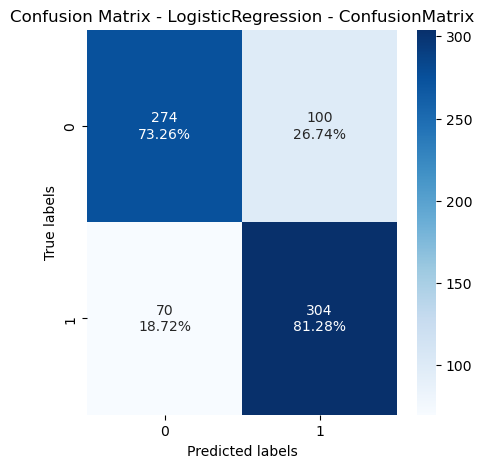

In [51]:
lreg = LogisticRegression()
train_evaluate_model(lreg, "LogisticRegression - ConfusionMatrix", x_train, y_train, x_test, y_test)

classification_report - train
              precision    recall  f1-score   support

          No       0.73      0.78      0.75      1386
         Yes       0.80      0.74      0.77      1604

    accuracy                           0.76      2990
   macro avg       0.76      0.76      0.76      2990
weighted avg       0.76      0.76      0.76      2990

classification_report - test
              precision    recall  f1-score   support

          No       0.73      0.80      0.76       343
         Yes       0.81      0.75      0.78       405

    accuracy                           0.77       748
   macro avg       0.77      0.77      0.77       748
weighted avg       0.77      0.77      0.77       748



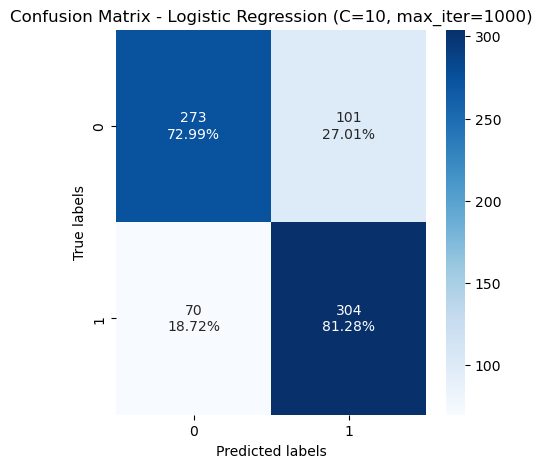

In [52]:
lreg_param = LogisticRegression(C=10, max_iter=1000)
train_evaluate_model(lreg_param, "Logistic Regression (C=10, max_iter=1000)", x_train, y_train, x_test, y_test)

classification_report - train
              precision    recall  f1-score   support

          No       0.76      0.83      0.79      1369
         Yes       0.84      0.78      0.81      1621

    accuracy                           0.80      2990
   macro avg       0.80      0.80      0.80      2990
weighted avg       0.80      0.80      0.80      2990

classification_report - test
              precision    recall  f1-score   support

          No       0.72      0.79      0.75       342
         Yes       0.81      0.74      0.77       406

    accuracy                           0.76       748
   macro avg       0.76      0.77      0.76       748
weighted avg       0.77      0.76      0.77       748



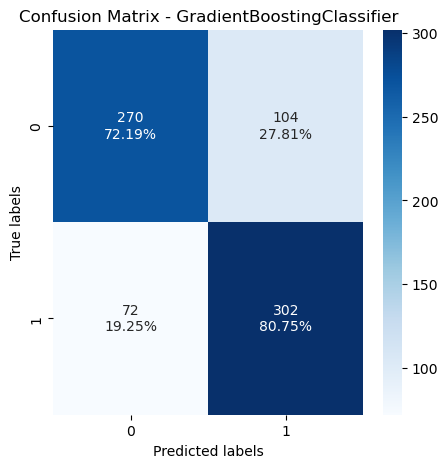

-------------------------------------------------------------------------------
classification_report - train
              precision    recall  f1-score   support

          No       0.74      0.82      0.78      1350
         Yes       0.84      0.76      0.80      1640

    accuracy                           0.79      2990
   macro avg       0.79      0.79      0.79      2990
weighted avg       0.79      0.79      0.79      2990

classification_report - test
              precision    recall  f1-score   support

          No       0.74      0.80      0.77       346
         Yes       0.81      0.76      0.78       402

    accuracy                           0.78       748
   macro avg       0.78      0.78      0.78       748
weighted avg       0.78      0.78      0.78       748



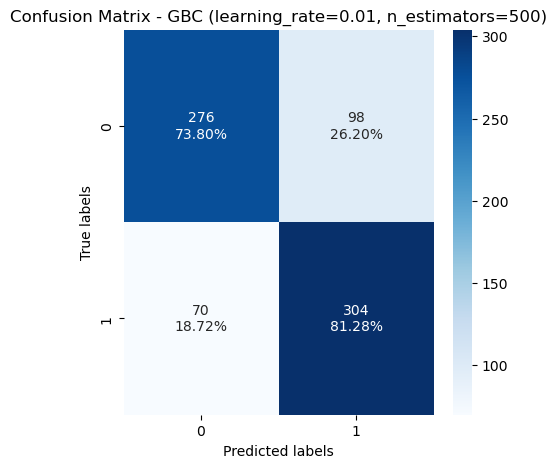

In [53]:
gbc = GradientBoostingClassifier()
train_evaluate_model(gbc, "GradientBoostingClassifier", x_train, y_train, x_test, y_test)
print('-------------------------------------------------------------------------------')

gbc_param = GradientBoostingClassifier(learning_rate=0.01, n_estimators=500)
train_evaluate_model(gbc_param, "GBC (learning_rate=0.01, n_estimators=500)", x_train, y_train, x_test, y_test)

classification_report - train
              precision    recall  f1-score   support

          No       0.76      0.81      0.79      1398
         Yes       0.82      0.77      0.80      1592

    accuracy                           0.79      2990
   macro avg       0.79      0.79      0.79      2990
weighted avg       0.79      0.79      0.79      2990

classification_report - test
              precision    recall  f1-score   support

          No       0.70      0.78      0.74       339
         Yes       0.80      0.73      0.76       409

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.75      0.75      0.75       748



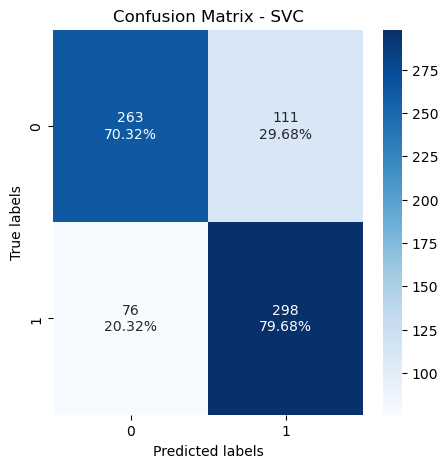

-------------------------------------------------------------------------------
classification_report - train
              precision    recall  f1-score   support

          No       0.69      0.79      0.74      1307
         Yes       0.82      0.73      0.77      1683

    accuracy                           0.76      2990
   macro avg       0.76      0.76      0.75      2990
weighted avg       0.76      0.76      0.76      2990

classification_report - test
              precision    recall  f1-score   support

          No       0.72      0.81      0.76       331
         Yes       0.83      0.75      0.79       417

    accuracy                           0.77       748
   macro avg       0.77      0.78      0.77       748
weighted avg       0.78      0.77      0.77       748



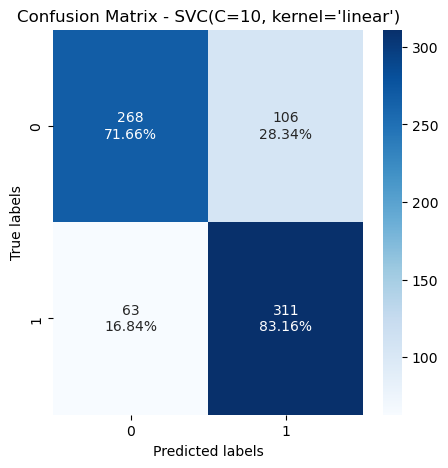

In [54]:
svc = SVC()
train_evaluate_model(svc, "SVC", x_train, y_train, x_test, y_test)
print('-------------------------------------------------------------------------------')

svc_param = SVC(C=10, kernel='linear')
train_evaluate_model(svc_param, "SVC(C=10, kernel='linear')", x_train, y_train, x_test, y_test)

classification_report - train
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1423
           1       0.98      0.94      0.96      1567

    accuracy                           0.96      2990
   macro avg       0.96      0.96      0.96      2990
weighted avg       0.96      0.96      0.96      2990

classification_report - test
              precision    recall  f1-score   support

           0       0.69      0.75      0.72       351
           1       0.76      0.71      0.73       397

    accuracy                           0.72       748
   macro avg       0.73      0.73      0.72       748
weighted avg       0.73      0.72      0.72       748



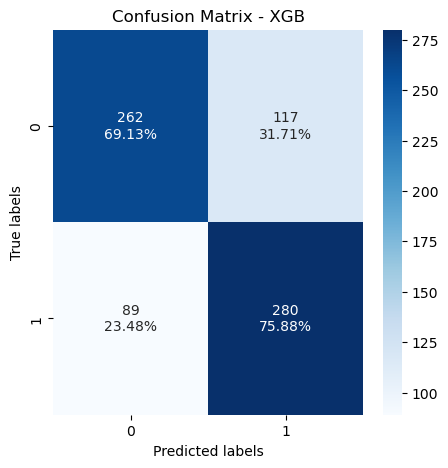

-------------------------------------------------------------------------------
classification_report - train
              precision    recall  f1-score   support

           0       0.74      0.82      0.78      1350
           1       0.84      0.77      0.80      1640

    accuracy                           0.79      2990
   macro avg       0.79      0.80      0.79      2990
weighted avg       0.80      0.79      0.79      2990

classification_report - test
              precision    recall  f1-score   support

           0       0.69      0.79      0.73       330
           1       0.81      0.72      0.76       418

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.76      0.75      0.75       748



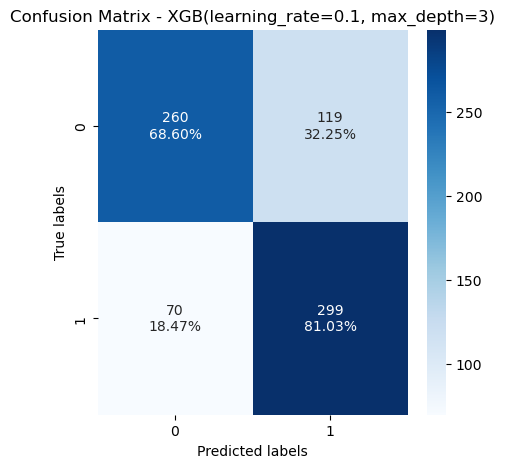

In [55]:
# Selecting XGBClassifer
# Encode the target variable y
y_encoded = encoder.fit_transform(y)

# Split the data into training and testing sets
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

xgb = XGBClassifier()
train_evaluate_model(xgb, "XGB", x_train2, y_train2, x_test2, y_test2)
print('-------------------------------------------------------------------------------')

xgb_param = XGBClassifier(learning_rate=0.1, max_depth=3)
train_evaluate_model(xgb_param, "XGB(learning_rate=0.1, max_depth=3)", x_train2, y_train2, x_test2, y_test2)

In a customer churn prediction project, focusing on false negatives (missed churn) is generally more important than false positives (incorrectly predicting churn). Here's why:

- Cost of Losing a Customer: Retaining an existing customer is typically much cheaper than acquiring a new one. Losing a customer due to churn means losing their future revenue stream, and potentially their positive word-of-mouth marketing.
- Impact of False Negatives: When a customer churns and the model fails to predict it (false negative), you miss the opportunity to intervene and potentially retain them. This lost customer can have a significant financial impact.
- Impact of False Positives: While a false positive means you might unnecessarily reach out to a customer who isn't going to churn, the cost of such outreach is typically lower compared to losing a customer entirely. You might invest a small amount in a retention offer that doesn't convert, but at least you haven't lost the customer completely.

### Optimized GBC Model gave the lowest false negative of 98, and a high accuracy score of 78%

In [56]:
import warnings
from sklearn.exceptions import DataConversionWarning

# Suppress warnings
warnings.filterwarnings("ignore", category=DataConversionWarning)
warnings.filterwarnings("ignore", category=UserWarning)

def predict_churn(data, model, scaler, encoders):

  # Handle different input data types
  if not isinstance(data, (pd.DataFrame, np.ndarray)):
    raise TypeError("Input data must be a pandas.DataFrame or numpy.ndarray.")

  # Convert DataFrame to NumPy array for processing
  if isinstance(data, pd.DataFrame):
    input_arr = np.asarray(data)
  else:
    input_arr = data

  # Reshape for single instance prediction
  input_arr2 = input_arr.reshape(1, -1)

  # Identify categorical columns within the function
  categorical_cols = data.select_dtypes(include='object').columns

  # Encode categorical variables
  for col in categorical_cols:
    # Create a new LabelEncoder for each column within the loop
    encoder = LabelEncoder()
    input_arr2[:, col] = encoder.fit_transform(input_arr2[:, col].reshape(-1, 1)).reshape(1, -1)

  # Standardize numerical data (if applicable)
  if scaler is not None:
    stdz_input = scaler.transform(input_arr2)
  else:
    stdz_input = input_arr2

  # Make prediction
  prediction = model.predict(stdz_input)

  # Return the prediction as a probability (assuming a classification model)
  return prediction[0]

# Assuming you have a pre-trained GradientBoostingClassifier model (gbc_param)
# and a scaler object (optional)
# Prepare a dictionary of encoders fitted on your training data (replace with your data)
encoders = {}
for col in data.select_dtypes(include='object').columns:  # Identify categorical columns from your training data
  encoders[col] = LabelEncoder()
  encoders[col].fit(data[col])  # Fit the encoders on your training data

# Input data (replace with your actual input)
input_data = pd.DataFrame([['Male', 1, 'Yes', 'No', 27, 'Yes', 'Yes', 'Fiber optic', 'No',
                             'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes',
                             'Electronic check', 75.5, 1893.95]])

result = predict_churn(input_data, gbc_param, scaler, encoders)
print("The predicted churn probability is:", result)

The predicted churn probability is: Yes


In [59]:
np.asarray(data.loc[1001]) # churn - 'Yes'

array(['Male', 1, 'Yes', 'No', 27, 'Yes', 'Yes', 'Fiber optic', 'No',
       'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes',
       'Electronic check', 75.5, 1893.95, 'Yes', '15-28',
       'Medium-High (58.26-78.25)', 'Medium (1734.81-3450.80)'],
      dtype=object)

In [58]:
# Productionizing the best performing model
# Serializing the best model for subsequent and easy usage
import joblib

# save model as a pickle file
filename = './customer_churn.pkl'
joblib.dump(lreg, filename)

['./customer_churn.pkl']